<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '401110642'
Name = 'Seyyed Yousef'
Last_Name = 'Miryousefi' 

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X ** 6 - 0.5 * X ** 5 + 2 * X ** 4 - 5 * X ** 3 + 3 * X ** 2 - 10 * X + 5 + noise
    
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

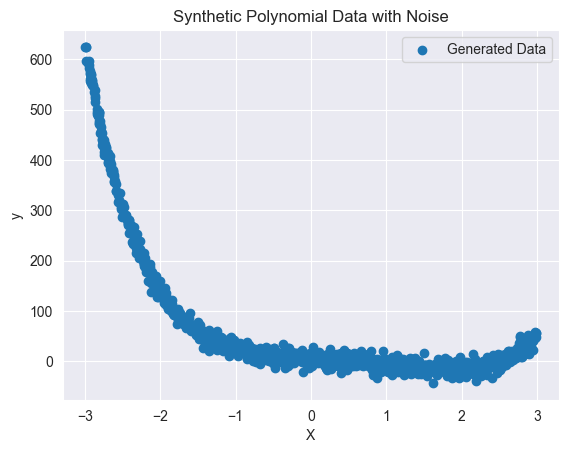

In [4]:
X, y = generate_dataset(-3, 3)

fig, axis = plt.subplots()
axis.scatter(X, y, label='Generated Data')
axis.set_xlabel('X')
axis.set_ylabel('y')
axis.set_title('Synthetic Polynomial Data with Noise')
plt.legend()
plt.show()


## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(X,y, test_size=0.2, random_state=43)

X_out_range_test, y_out_range_test = generate_dataset(5, 7, len(X_in_range_test))

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

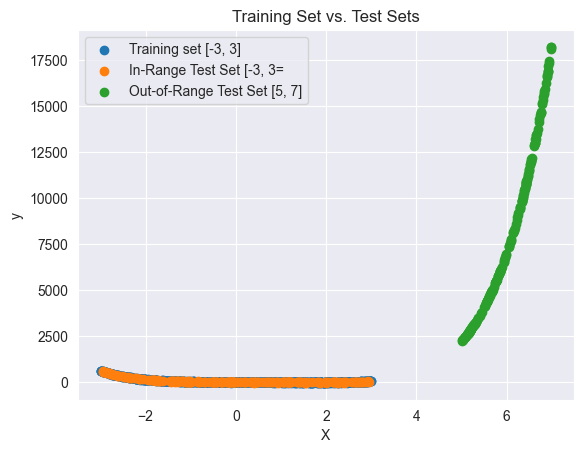

In [6]:
fig, axis = plt.subplots()
axis.scatter(X_train, y_train, label="Training set [-3, 3]")
axis.scatter(X_in_range_test, y_in_range_test, label="In-Range Test Set [-3, 3=")
axis.scatter(X_out_range_test, y_out_range_test, label="Out-of-Range Test Set [5, 7]")
axis.set_title("Training Set vs. Test Sets")
axis.set_xlabel("X")
axis.set_ylabel("y")
plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
def train_models(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    
    return model

In [8]:
models = {}
degree = 9
degrees = range(2, degree+1)

for d in degrees:
    models[d] = train_models(X_train, y_train, d)


## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    losses = []
    for _, model in models.items():
        # print(model)
        y_pred = model.predict(X_test.reshape(-1, 1))
        losses.append(mean_squared_error(y_test, y_pred))
    return np.array(losses)

In [10]:
train_mse = evaluate_models(models, X_train, y_train)
in_range_mse = evaluate_models(models, X_in_range_test, y_in_range_test)
out_of_range_mse = evaluate_models(models, X_out_range_test, y_out_range_test)

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

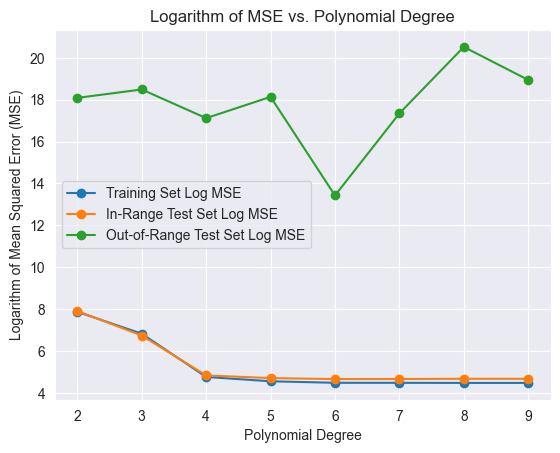

In [11]:
log_of_train_mse = np.log(train_mse)
log_of_in_range_mse = np.log(in_range_mse)
log_of_out_of_range_mse = np.log(out_of_range_mse)

fig, axis = plt.subplots()
axis.set_title('Logarithm of MSE vs. Polynomial Degree')
axis.set_xlabel('Polynomial Degree')
axis.set_ylabel('Logarithm of Mean Squared Error (MSE)')
axis.plot(degrees, log_of_train_mse, label='Training Set Log MSE',marker='o')
axis.plot(degrees, log_of_in_range_mse, label='In-Range Test Set Log MSE',marker='o')
axis.plot(degrees, log_of_out_of_range_mse, label='Out-of-Range Test Set Log MSE',marker='o')
plt.legend()
plt.show()


In [12]:
print('Degree    Train MSE           In-Range Test MSE   Out-of-Range Test MSE')
for i, d in enumerate(degrees):
    print(f'{d}         {log_of_train_mse[i]:.2f}                {log_of_in_range_mse[i]:.2f}                {log_of_out_of_range_mse[i]:.2f}')

Degree    Train MSE           In-Range Test MSE   Out-of-Range Test MSE
2         7.87                7.91                18.09
3         6.83                6.74                18.49
4         4.77                4.84                17.12
5         4.56                4.71                18.13
6         4.49                4.66                13.43
7         4.48                4.67                17.35
8         4.48                4.68                20.52
9         4.48                4.68                18.94


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** As the degree of the model increases, the loss of training set and the In-range training set decreases. This is because model gets more complex and overfits the training data but as we can see this results an increase in the out-of-range training set due to the increase of variance. On the other side decrease in degree and complexity of the mode will result in an increase of all of the losses. Since the model is too simple it cannot predict the data which result in large bias of the model. As we can clearly see there is a trade of between the bias and the variance of the model and best results are achieved when the model have the right degree.  </span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** As we can see the loss of the out-of-range test set gets to its minimum when the degree of model is equal to 6. Any degree less than 6 will result in increase of in-range and out-of-range test sets losses which means that the bias is increasing and the model is underfitting. on the other hand degrees grater than 6 will increase out-of-range test set loss but decreases in-range test set loss. This indicates that the model is overfitting to the training data and its variance is increasing. </span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [13]:
file_path = "./InsuranceData.csv"
dataset = pd.read_csv(file_path)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [14]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Preprocessing

In [15]:
# Encoding
new_data = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'], dtype='float64')
new_data['age'] = np.float64(new_data['age'])
new_data['children'] = np.float64(new_data['children'])

# Normalizing
for feature in ['age', 'bmi', 'children']:
    new_data[feature] = (new_data[feature] - new_data[feature].mean()) / new_data[feature].std()

In [16]:
train, test = train_test_split(new_data, test_size=0.2, random_state=43)

X_train = train.drop('charges', axis=1)
y_train = train['charges']
X_test = test.drop('charges', axis=1)
y_test = test['charges']

# Training

Fit a linear regressor to the data.

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of Linear Regression Model:


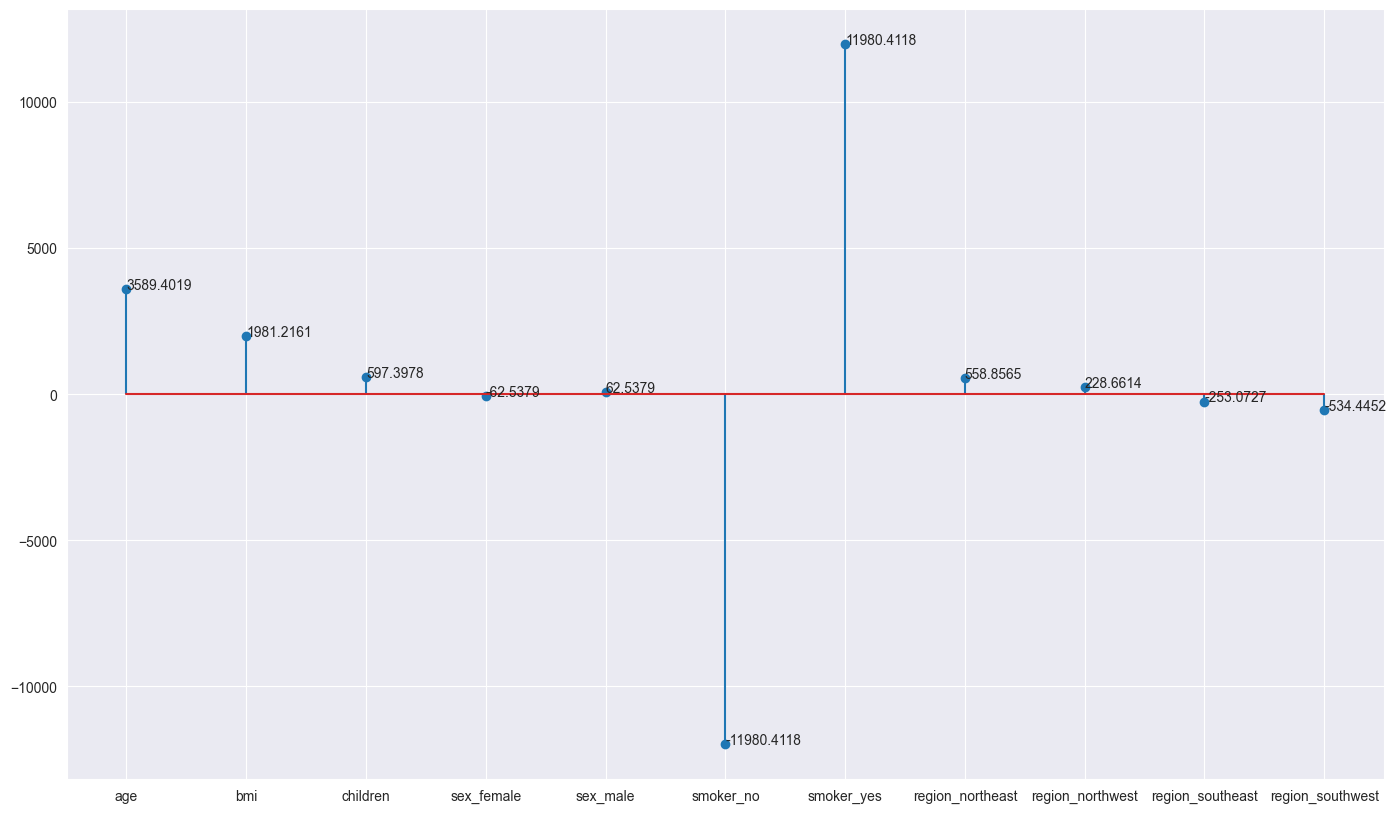

Coefficients:
 [  3589.40192374   1981.21607453    597.39783626    -62.53794773
     62.53794773 -11980.41184422  11980.41184422    558.85645534
    228.66136819   -253.07266316   -534.44516037]


In [18]:
coefficients = regressor.coef_
X = []
for column in X_train.columns: X.append(column)

def plot_coefficients(x, y, title):
    print(title)
    plt.figure(figsize=(17, 10))
    plt.stem(x, y)
    for a, b in zip(X, coefficients):
        plt.text(a, b, f'{b:.4f}')
    plt.grid(True)
    plt.show()
    print('Coefficients:\n', coefficients)

plot_coefficients(X, coefficients, 'Coefficients of Linear Regression Model:')

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

Coefficients of Lasso Regression Model:


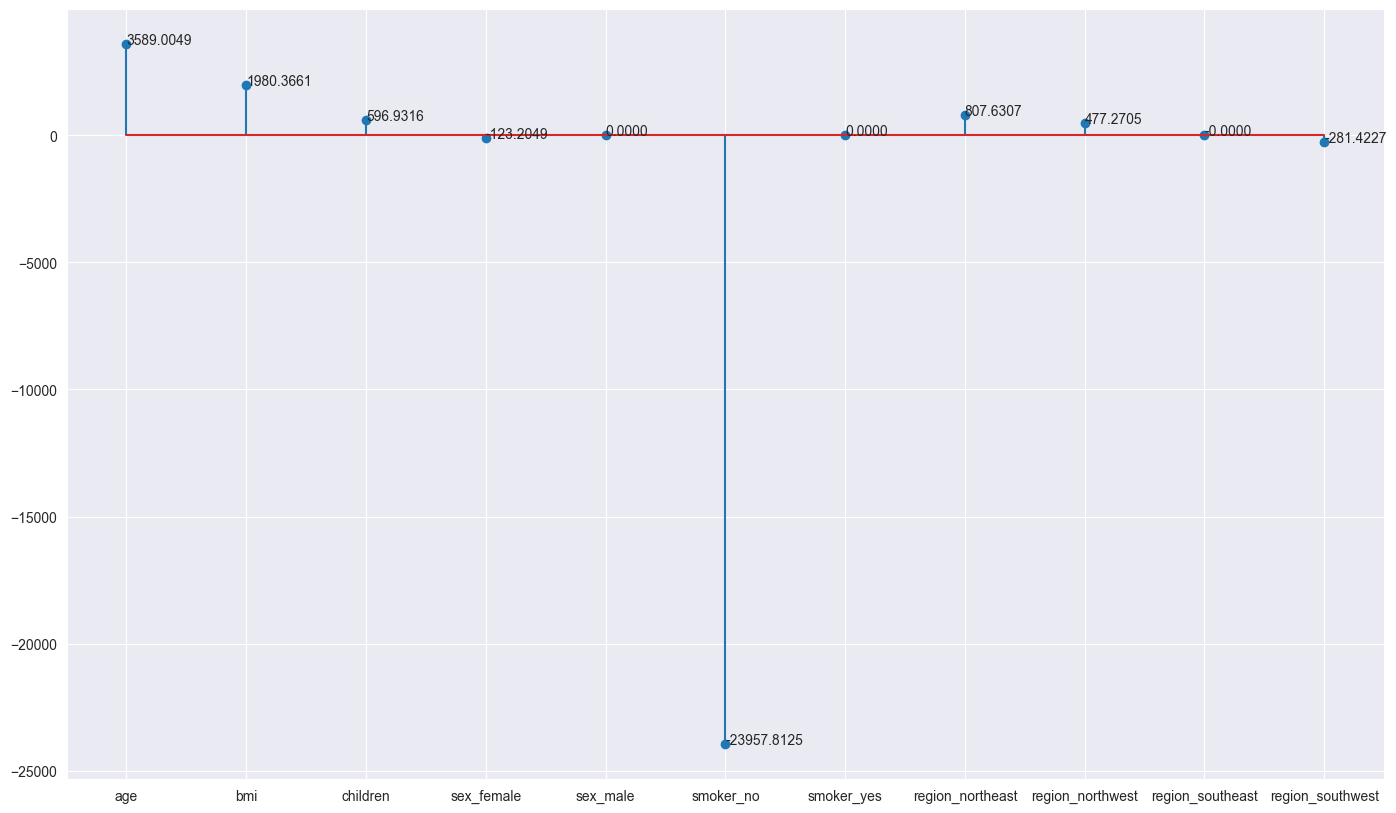

Coefficients:
 [ 3.58900491e+03  1.98036611e+03  5.96931565e+02 -1.23204904e+02
  1.09704554e-13 -2.39578125e+04  0.00000000e+00  8.07630657e+02
  4.77270480e+02 -0.00000000e+00 -2.81422720e+02]


In [19]:
lasso_regressor = Lasso(alpha=0.5)
lasso_regressor.fit(X_train, y_train)

coefficients = lasso_regressor.coef_
plot_coefficients(X, coefficients,'Coefficients of Lasso Regression Model:')

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

Coefficients of Ridge Regression Model:


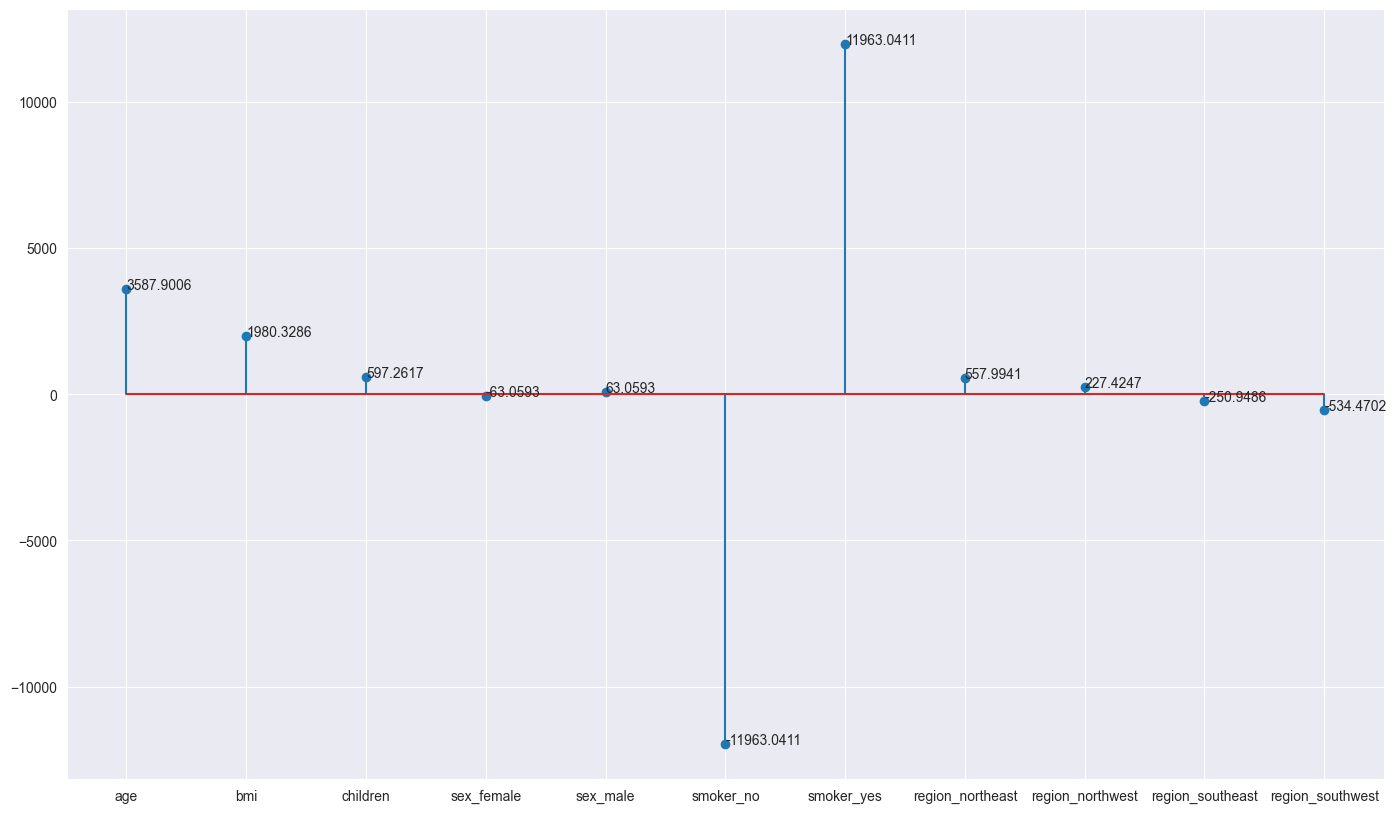

Coefficients:
 [  3587.90062727   1980.32862068    597.26172975    -63.05930195
     63.05930195 -11963.04107147  11963.04107147    557.99412515
    227.42467384   -250.94855325   -534.47024574]


In [20]:
ridge_regressor = Ridge(alpha=0.5)
ridge_regressor.fit(X_train, y_train)

coefficients = ridge_regressor.coef_
plot_coefficients(X, coefficients,'Coefficients of Ridge Regression Model:')

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [21]:
alphas = np.logspace(-7, 7, 1000)
linear_mape = []
lasso_mape = []
ridge_mape = []

def find_best_alpha(alphas, X_train, y_train, model='linear'):
    regressor = None
    if model == 'linear':
        regressor = LinearRegression()
    elif model == 'lasso':
        regressor = Lasso()
    elif model == 'ridge':
        regressor = Ridge()
    
    best_alpha = 0
    best_mape = 100
    kf = KFold(n_splits=5, shuffle=True, random_state=43)
    if model == 'linear':
        mape_list = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
        print('Linear Model\'s MAPE:', -mape_list.mean())
        regressor.fit(X_train, y_train)
    else:
        mape_list = []
        for alpha in alphas:
            regressor.set_params(alpha=alpha)
            mape_list = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
            mape = -mape_list.mean()
            if mape < best_mape:
                best_mape = mape
                best_alpha = alpha
        regressor.set_params(alpha=best_alpha)
        regressor.fit(X_train, y_train)
        print(f'{model.capitalize()} Model\'s MAPE:', best_mape)
        print(f'Best Alpha for {model.capitalize()} Model:', best_alpha)
        
    return best_alpha
        
find_best_alpha(alphas, X_train, y_train)
lasso_alpha = find_best_alpha(alphas, X_train, y_train, model='lasso')
ridge_alpha = find_best_alpha(alphas, X_train, y_train, model='ridge')

Linear Model's MAPE: 0.4130302939279802
Lasso Model's MAPE: 0.4110090264373321
Best Alpha for Lasso Model: 24.009348768606518
Ridge Model's MAPE: 0.4115254394513553
Best Alpha for Ridge Model: 1e-07


    Add extra variables to dataset to make model more complex, then compare the results. 

In [22]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lasso_regressor = Lasso(alpha=lasso_alpha)
lasso_regressor.fit(X_train_poly, y_train)
ridge_regressor = Ridge(alpha=ridge_alpha)
ridge_regressor.fit(X_train_poly, y_train)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_poly, y_train)

LinearRegression()

Report your best model with its evaluated results.

In [23]:
def evaluate_model(regressor, X_train, y_train, X_test, y_test):
    y_train_prediction = regressor.predict(X_train)
    y_test_prediction = regressor.predict(X_test)
    train_mape = mean_absolute_percentage_error(y_train, y_train_prediction)
    test_mape = mean_absolute_percentage_error(y_test, y_test_prediction)
    return train_mape, test_mape

linear_mape_train, linear_mape_test = evaluate_model(linear_regressor, X_train_poly, y_train, X_test_poly, y_test)
lasso_mape_train, lasso_mape_test = evaluate_model(lasso_regressor, X_train_poly, y_train, X_test_poly, y_test)
ridge_mape_train, ridge_mape_test = evaluate_model(ridge_regressor, X_train_poly, y_train, X_test_poly, y_test)

print('Linear Model\'s MAPE on Training Set:', linear_mape_train)
print('Linear Model\'s MAPE on Test Set:', linear_mape_test)
print('Lasso Model\'s MAPE on Training Set:', lasso_mape_train)
print('Lasso Model\'s MAPE on Test Set:', lasso_mape_test)
print('Ridge Model\'s Mape on Training Set:', ridge_mape_train)
print('Ridge Model\'s Mape on Test Set', ridge_mape_test)

Linear Model's MAPE on Training Set: 0.25081662449895387
Linear Model's MAPE on Test Set: 0.28678633772371154
Lasso Model's MAPE on Training Set: 0.2593181474723717
Lasso Model's MAPE on Test Set: 0.29409816872813405
Ridge Model's Mape on Training Set: 0.2511856808449113
Ridge Model's Mape on Test Set 0.28715317783815425


In [24]:
insurance_data = pd.read_csv('InsuranceData_test.csv')

# Encoding
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], dtype='float64')
insurance_data['age'] = np.float64(insurance_data['age'])
insurance_data['children'] = np.float64(insurance_data['children'])

# Normalizing
for feature in ['age', 'bmi', 'children']:
    insurance_data[feature] = (insurance_data[feature] - insurance_data[feature].mean()) / insurance_data[feature].std()
    
model = make_pipeline(PolynomialFeatures(2), Ridge(ridge_alpha))
model.fit(X_train, y_train)
prediction = model.predict(insurance_data)
submission = pd.DataFrame({'charges': prediction})
submission.to_csv('submission.csv', index=False)

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** In L1 regularization, the penalty is based on the absolute values of the coefficients, which often reduces some of them to zero. This makes the model simpler and easier to interpret, as only a few features are actively used in making predictions. L2 regularization, however, uses the square of the coefficients as a penalty. This shrinks the coefficients but doesn't usually make them zero, so it doesn't reduce the number of features used. While L1 regularization is better for selecting important features and simplifying the model, L2 regularization is better for preventing overfitting and reducing the effects of outliers. </span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** Alpha sets the strength of the penalty term in the loss function, which affects how much regularization impacts the model. A higher alpha value increases the penalty, adding more regularization and often resulting in simpler models with smaller coefficients. In L1 regularization, increasing alpha can make more coefficients zero, creating a sparser model with fewer features. In L2 regularization, a higher alpha shrinks all coefficients more evenly, reducing their size and helping to prevent overfitting. Choosing the right alpha is important for balancing bias and variance in the model, as it helps find the best trade-off between simplicity and performance. A well-chosen alpha can improve how well the model generalizes and make it easier to understand by encouraging fewer features and smaller coefficients.</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** Regularization can influence the model's complexity and the number of features it uses for predictions. With L1 regularization, the penalty encourages some coefficients to go to zero, which results in feature selection and reduces the number of features, making the model simpler and easier to interpret. In contrast, L2 regularization reduces the size of the coefficients without setting them to zero. This helps prevent overfitting by shrinking the coefficients but doesn’t remove features. As a result, L1 regularization is better for reducing the number of features and selecting important ones, while L2 regularization is more focused on preventing overfitting and minimizing the effect of outliers without changing the number of features used.</span>